# Artificial Neural Networks - Forward Propagation

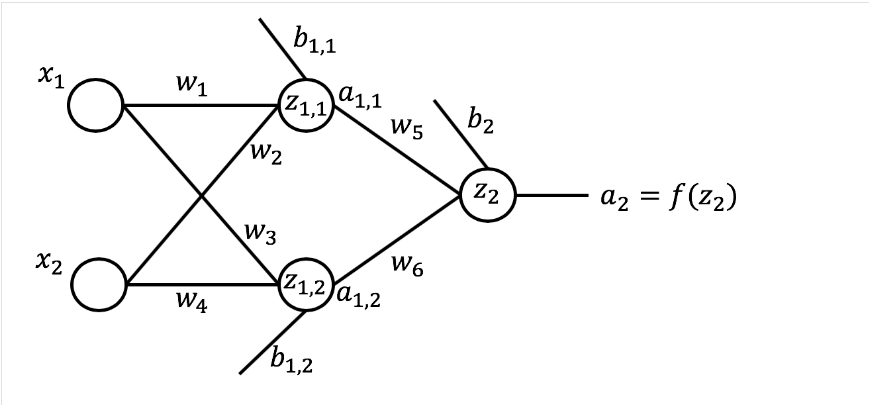

Initializing the weights and the biases in the network:

In [4]:
import numpy as np

weights = np.around(np.random.uniform(size=6), decimals=2)
biases = np.around(np.random.uniform(size=3), decimals=2)

In [5]:
print(weights)
print(biases)

[0.52 0.94 0.98 0.52 0.23 0.37]
[0.33 0.98 0.86]


Compute the output for a given input, 𝑥1  and 𝑥
 

In [7]:
x1 = 0.5
x2 = 0.85

print(f'x1: {x1}   ,   x2: {x2}')

x1: 0.5   ,   x2: 0.85


Computing the wighted sum of the inputs,, at the first node of the hidden laye:r

In [8]:
z11 = x1*weights[0] + x2*weights[1] + biases[0]

print(f'z11: {z11}')

z11: 1.389


Computing the wighted sum of the inputs, at the second node of the hidden layer:

In [9]:
z12 = x1*weights[2] + x2*weights[3] + biases[1]

print(f'z12: {z12}')

z12: 1.912


Compute the activation of the first node assuming sigmoid activation:

In [17]:
a11 = 1.0 / (1 + np.exp(-z11))

print(f'a11: {round(a11, 4)}')

a11: 0.8004


Compute the activation of the second node assuming sigmoid activation:

In [18]:
a12 = 1.0 / (1 + np.exp(-z12))

print(f'a11: {round(a12, 4)}')

a11: 0.8712


Compute the weighted sum of a11, a12 inputs to the node in the output layer:

In [19]:
z2 = a11*weights[4] + a12*weights[5] + biases[2]

print(f'z2: {round(z2, 4)}')

z2: 1.3665


The output of the network:

In [21]:
a2 = 1.0 / (1.0 + np.exp(-z2))

print(f'a2: {round(a2, 4)}')

a2: 0.7968


### Initialize a Network
Code an automatic way of making predictions

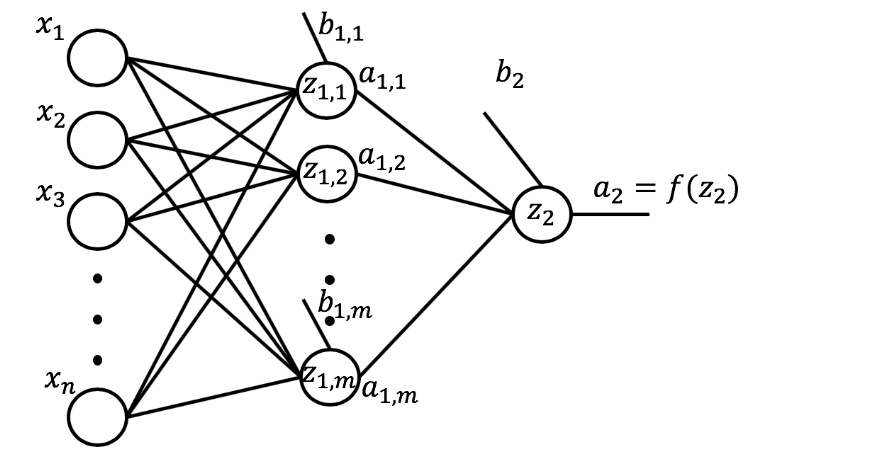

In [23]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}

    # loop through each layer and randomly initialize the weights and biases associated with each node
    # notice how we are adding 1 to the number of hidden layers in order to include the output layer
    for layer in range(num_hidden_layers +1 ):
        
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output

        else:
            layer_name = f'layer_{layer + 1}'
            num_nodes = num_nodes_hidden[layer]

        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = f'node_{node+1}'
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }
            
        num_nodes_previous = num_nodes

    return network

In [24]:
n = 2 # number of inputs
num_hidden_layers = 5 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 1 # number of nodes in the output layer

In [30]:
small_network = initialize_network(n, num_hidden_layers, m, num_nodes_output)
small_network

{'layer_1': {'node_1': {'weights': array([0.76, 0.02]), 'bias': array([0.14])},
  'node_2': {'weights': array([0.12, 0.31]), 'bias': array([0.67])}},
 'layer_2': {'node_1': {'weights': array([0.47, 0.82]), 'bias': array([0.29])},
  'node_2': {'weights': array([0.73, 0.7 ]), 'bias': array([0.33])}},
 'output': {'node_1': {'weights': array([0.33, 0.98]), 'bias': array([0.62])}}}

### Compute Weighted Sum at Each Node

In [45]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

In [46]:
from random import seed

np.random.seed(12)
inputs = np.around(np.random.uniform(size=2), decimals=2)

print(f'The inputs to the network are {inputs}')

The inputs to the network are [0.15 0.74]


In [47]:
node_weights = small_network['layer_1']['node_1']['weights']
node_bias = small_network['layer_1']['node_1']['bias']

weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)
print(f'The weighted sum at the first node in the hidden layer is {np.around(weighted_sum[0], decimals=4)}')

The weighted sum at the first node in the hidden layer is 0.2688


### Compute Node Activation

In [48]:
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

In [49]:
node_output  = node_activation(compute_weighted_sum(inputs, node_weights, node_bias))
print(f'The output of the first node in the hidden layer is {np.around(node_output[0], decimals=4)}')

The output of the first node in the hidden layer is 0.5668


### Forward Propagation

In [50]:
def forward_propagate(network, inputs):
    
    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer
    
    for layer in network:
        
        layer_data = network[layer]
        
        layer_outputs = [] 
        for layer_node in layer_data:
        
            node_data = layer_data[layer_node]
        
            # compute the weighted sum and the output of each node at the same time 
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))
            
        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))
    
        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

In [51]:
predictions = forward_propagate(small_network, inputs)
print(f'The predicted value by the network for the given input is {np.around(predictions[0], decimals=4)}')

The outputs of the nodes in hidden layer number 1 is [0.5668, 0.7145]
The outputs of the nodes in hidden layer number 2 is [0.7581, 0.7762]
The predicted value by the network for the given input is 0.8363
